# Proyecto Primer Parcial – Análisis de Datos del Pórtico

**Materia:** Análisis de Datos – Maestría en Ciencias de la Tierra  
**Tema:** Análisis Exploratorio de Datos y Visualización usando Python  
**Datos:** Base estructural de un pórtico con diferentes configuraciones geométricas y cargas


## Contexto del Proyecto y Justificación Técnica

Como parte de un proyecto de investigación en ingeniería estructural, se está desarrollando una herramienta computacional orientada a optimizar y automatizar el diseño de **naves industriales tipo cercha**, un tipo de estructura ampliamente utilizado en el sector industrial ecuatoriano. Estas estructuras se caracterizan por tener un techo a dos aguas y por estar conformadas por elementos triangulados que distribuyen eficientemente las cargas, permitiendo cubrir grandes luces con economía de material.

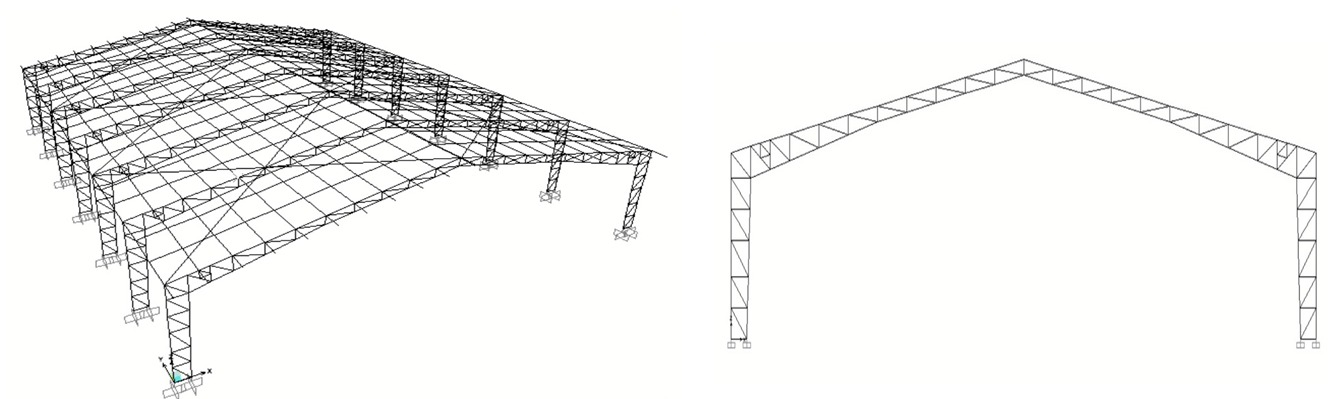

### ¿Por qué este tipo de estructuras?

Las cerchas son valoradas por su **eficiencia estructural y ligereza**, pero presentan **comportamientos complejos bajo cargas sísmicas**, especialmente en un contexto como el ecuatoriano, donde la sismicidad es alta. Actualmente, no existe una metodología automatizada que permita evaluar, de forma integral y rápida, cómo afectan parámetros como la **carga distribuida**, la **altura de las columnas**, la **luz del pórtico** o la **inclinación del faldón** al comportamiento estructural expresado en **momentos flectores y fuerzas internas**.

### ¿Cómo se relaciona con el curso de programación?

Utilizando herramientas abordadas en el curso de programación (Python, Pandas, Seaborn, Matplotlib, entre otras), se diseñó un sistema de análisis que trabaja sobre una base de datos generada previamente a partir de múltiples **combinaciones geométricas y estructurales**. A través de este entorno computacional, se pudo:

- Cargar, limpiar y explorar un conjunto de datos estructurales complejos.
- Visualizar gráficamente la respuesta estructural (`M1f`, `M2f`, `M3i`, etc.) en función de variables como `carga_distribuida`, `luz_total`, `altura_columna` e `inclinacion`.
- Automatizar parte del análisis mediante técnicas como histogramas apilados, matriz de correlación y gráficos de dispersión.
- Identificar tendencias relevantes que pueden alimentar futuros modelos de optimización estructural.





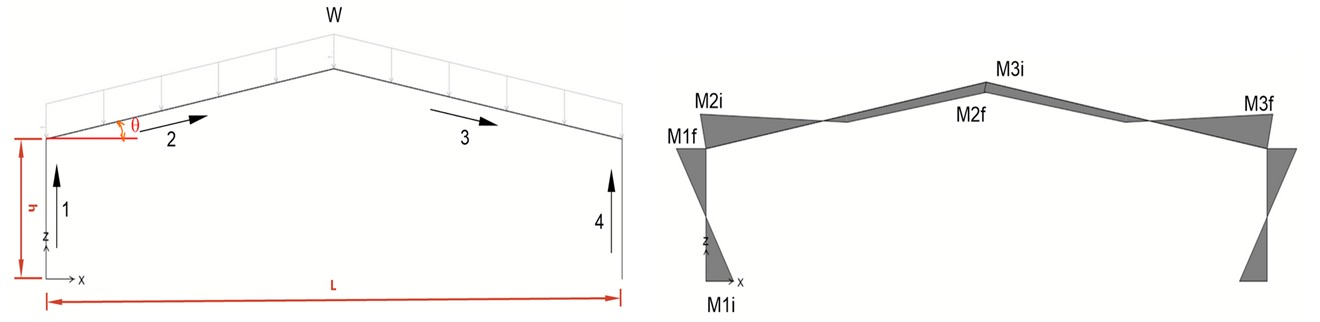

### ¿Cuál es el gap o problema que se aborda?

En el contexto ecuatoriano actual:

- No existe una herramienta computacional práctica ni normativa específica que oriente el **diseño eficiente y óptimo de naves industriales tipo cercha**.
- Los ingenieros deben analizar de forma manual decenas o cientos de combinaciones geométricas y de carga, lo cual **incrementa el tiempo de diseño, los costos constructivos y el riesgo estructural**.
- A su vez, **no se integra fácilmente el criterio estructural con enfoques de sostenibilidad**, como la reducción del material utilizado o la huella de carbono asociada.

Este proyecto investigación busca **cerrar esa brecha**, integrando programación, análisis estructural automatizado y algoritmos de optimización en una herramienta que facilite el diseño eficiente, adaptable y seguro de estructuras industriales en zonas sísmicas.

## Combinaciones Paramétricas Consideradas

Para generar la base de datos del análisis estructural, se definieron rangos discretos de valores que representan las principales variables geométricas y de carga que afectan el comportamiento de la nave industrial tipo cercha. Estas combinaciones fueron seleccionadas con base en criterios de diseño típicos y en condiciones representativas del contexto ecuatoriano:

- **Carga distribuida (`w`)**:  
  `[1, 2, 3, 4, 5]`  
  Representa diferentes niveles de solicitación estructural en unidades relativas, desde cargas livianas hasta condiciones severas.

- **Luz del pórtico (`L`)**:  
  `[10, 20, 30, 40, 50, 60, 70]`  
  Corresponde a longitudes totales del pórtico, que influyen directamente en la esbeltez y flexibilidad de la estructura.

- **Altura de las columnas (`h`)**:  
  `[5, 6, 7, ..., 20]`  
  Determina el nivel de elevación de la nave, afectando la magnitud de los momentos y desplazamientos laterales.

- **Inclinación del faldón (`theta`)**:  
  `[5, 6, 7, ..., 25]`  
  Expresada en grados, influye en la eficiencia del sistema de cerchas y en la distribución de cargas gravitatorias y sísmicas.

El producto cartesiano de estas combinaciones permitió generar automáticamente miles de configuraciones estructurales, cada una de ellas evaluada posteriormente mediante análisis estructural. Esta estrategia permitió cubrir un amplio espectro de posibilidades geométricas y funcionales para naves industriales en zonas sísmicas.


### Visuales de Referencia Utilizadas

Para documentar y comprender mejor el comportamiento estructural, se utilizaron diversos elementos gráficos de apoyo generados durante el desarrollo del proyecto:

- **Conjuntos de combinaciones geométricas**, definidos por los vectores `w`, `L`, `h` y `theta`, que resumen los parámetros principales del modelo.
- **Modelos estructurales generados en SAP2000**, con análisis completos de momentos internos (`M1f`, `M2f`, `M3i`) y visualización de deformadas.
- **Representaciones gráficas** del comportamiento estructural, incluyendo diagramas de momento flector y vistas 3D del pórtico.

Este análisis se desarrolló en el marco del curso de programación, aplicando herramientas como Python, Pandas y Seaborn. El proyecto evidencia cómo la programación puede ser una aliada estratégica en la automatización del diseño estructural, especialmente en entornos con alta sismicidad como el ecuatoriano.


## Introducción

El presente análisis se enfoca en explorar una base de datos relacionada con las solicitaciones internas (fuerzas y momentos) en un pórtico estructural, en función de variables como carga distribuida, luz total, altura de columna e inclinación del faldón. El objetivo es identificar patrones relevantes y relaciones significativas que aporten a la comprensión del comportamiento estructural del sistema modelado.




## Nombres de variables

Durante el desarrollo del análisis se usó la variable `datos_portico` para representar el conjunto de datos cargado. 
Este nombre fue elegido para que sea más representativo y claro, en lugar del genérico `df`, ya que describe mejor 
que se trata de una base con información estructural de un pórtico bajo diferentes condiciones de carga y geometría.



## Preparación del Entorno de Trabajo

Para este proyecto se creó un ambiente virtual con `Anaconda prompt`

### Pasos para reproducir el entorno:

### Crear el ambiente virtual
conda create -n Carlos

### Activar el entorno
### En Windows:
conda activate Carlos

### Instalar las dependencias
conda install pandas numpy matplotlib seaborn jupyterlab


```
Se usaron las siguientes librerías:
- `pandas`
- `numpy`
- `matplotlib`
- `seaborn`
- `jupyterlab`

El archivo `requirements.txt` contiene todas las versiones necesarias para reproducir el análisis.
```

In [1]:
# Carga de librerías y base de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración gráfica
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Carga de datos
datos_portico = pd.read_csv('Base de Datos del Pórtico.csv')
datos_portico.head()

,carga_distribuida,luz_total,altura_columna,inclinacion_faldon,N1i,V1i,M1i,N1f,V1f,M1f,...,M3i,N3f,V3f,M3f,N4i,V4i,M4i,N4f,V4f,M4f
0,1,10,5,5,5.0,-2.025866,-3.665165,-5.0,2.025866,-6.464165,...,-5.053955,-2.453936,4.804408,-6.464165,5.0,2.025866,6.464165,-5.0,-2.025866,3.665165
1,1,10,5,6,5.0,-2.025446,-3.714178,-5.0,2.025446,-6.413052,...,-4.884446,-2.536993,4.760893,-6.413052,5.0,2.025446,6.413052,-5.0,-2.025446,3.714178
2,1,10,5,7,5.0,-2.023215,-3.757477,-5.0,2.023215,-6.358600,...,-4.710851,-2.617481,4.716163,-6.358600,5.0,2.023215,6.358600,-5.0,-2.023215,3.757477
3,1,10,5,8,5.0,-2.019214,-3.795165,-5.0,2.019214,-6.300903,...,-4.533290,-2.695428,4.670320,-6.300903,5.0,2.019214,6.300903,-5.0,-2.019214,3.795165
4,1,10,5,9,5.0,-2.013477,-3.827338,-5.0,2.013477,-6.240048,...,-4.351864,-2.770860,4.623464,-6.240048,5.0,2.013477,6.240048,-5.0,-2.013477,3.827338


In [2]:
# Revisión de tipos de datos
datos_portico.info()

# Revisión de valores nulos
datos_portico.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carga_distribuida   11760 non-null  int64  
 1   luz_total           11760 non-null  int64  
 2   altura_columna      11760 non-null  int64  
 3   inclinacion_faldon  11760 non-null  int64  
 4   N1i                 11760 non-null  float64
 5   V1i                 11760 non-null  float64
 6   M1i                 11760 non-null  float64
 7   N1f                 11760 non-null  float64
 8   V1f                 11760 non-null  float64
 9   M1f                 11760 non-null  float64
 10  N2i                 11760 non-null  float64
 11  V2i                 11760 non-null  float64
 12  M2i                 11760 non-null  float64
 13  N2f                 11760 non-null  float64
 14  V2f                 11760 non-null  float64
 15  M2f                 11760 non-null  float64
 16  N3i 

carga_distribuida     0
luz_total             0
altura_columna        0
inclinacion_faldon    0
N1i                   0
V1i                   0
M1i                   0
N1f                   0
V1f                   0
M1f                   0
N2i                   0
V2i                   0
M2i                   0
N2f                   0
V2f                   0
M2f                   0
N3i                   0
V3i                   0
M3i                   0
N3f                   0
V3f                   0
M3f                   0
N4i                   0
V4i                   0
M4i                   0
N4f                   0
V4f                   0
M4f                   0
dtype: int64

## Revisión del Tipo de Datos y Calidad del Dataset

Como primer paso del preprocesamiento se realizó una inspección general del dataset utilizando `datos_portico.info()` y `datos_portico.isnull().sum()`.

- El dataset cuenta con **11.760 registros** y **28 columnas**, todas con valores no nulos.
- Las primeras cuatro columnas (`carga_distribuida`, `luz_total`, `altura_columna`, `inclinacion_faldon`) representan las variables geométricas y de carga del pórtico.
- El resto corresponde a las solicitaciones internas (fuerza axial `N`, cortante `V`, momento flector `M`) en diferentes nodos del pórtico, al inicio (`i`) y al final (`f`) de cada elemento.
- Todos los datos se encuentran completos, sin valores faltantes ni errores en los tipos de datos.

Esta verificación confirma que el dataset está **limpio y listo para el análisis exploratorio**.


In [3]:
# Estadísticas descriptivas
datos_portico.describe()

,carga_distribuida,luz_total,altura_columna,inclinacion_faldon,N1i,V1i,M1i,N1f,V1f,M1f,...,M3i,N3f,V3f,M3f,N4i,V4i,M4i,N4f,V4f,M4f
count,11760.000000,11760.00000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,...,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000
mean,3.000000,40.00000,12.500000,15.000000,60.000000,-50.078419,-256.556262,-60.000000,50.078419,-291.425848,...,-49.116445,-63.801705,45.706407,-291.425848,60.000000,50.078419,291.425848,-60.000000,-50.078419,256.556262
std,1.414274,20.00085,4.609968,6.055558,43.590843,57.640773,278.671603,43.590843,57.640773,298.365733,...,148.534925,64.569960,31.645710,298.365733,43.590843,57.640773,298.365733,43.590843,57.640773,278.671603
min,1.000000,10.00000,5.000000,5.000000,5.000000,-578.774265,-1708.874253,-175.000000,0.305447,-1658.794615,...,-962.870504,-591.824109,3.813263,-1658.794615,5.000000,0.305447,3.922919,-175.000000,-578.774265,2.137249
25%,2.000000,20.00000,8.750000,10.000000,25.000000,-71.018646,-373.475837,-90.000000,9.161309,-429.205439,...,-94.829565,-92.131970,19.437273,-429.205439,25.000000,9.161309,67.305414,-90.000000,-71.018646,46.936168
50%,3.000000,40.00000,12.500000,15.000000,50.000000,-29.890044,-158.171549,-50.000000,29.890044,-192.378907,...,-29.924502,-41.643150,38.328411,-192.378907,50.000000,29.890044,192.378907,-50.000000,-29.890044,158.171549
75%,4.000000,60.00000,16.250000,20.000000,90.000000,-9.161309,-46.936168,-25.000000,71.018646,-67.305414,...,-4.141423,-15.953122,65.623261,-67.305414,90.000000,71.018646,429.205439,-25.000000,-9.161309,373.475837
max,5.000000,70.00000,20.000000,25.000000,175.000000,-0.305447,-2.137249,-5.000000,578.774265,-3.922919,...,663.805675,-0.750147,162.434801,-3.922919,175.000000,578.774265,1658.794615,-5.000000,-0.305447,1708.874253


## Estadísticas Descriptivas

Se aplicó `datos_portico.describe()` para obtener un resumen estadístico de las variables numéricas. Este análisis es útil para identificar el rango de valores, posibles anomalías y entender la distribución general de los datos.

### Observaciones clave:

- Las variables geométricas (`carga_distribuida`, `luz_total`, `altura_columna`, `inclinacion_faldon`) presentan valores mínimos, máximos y medias consistentes con un conjunto de simulaciones estructurales bien diseñado.
- Las solicitaciones internas (momentos, fuerzas) muestran variaciones amplias, lo cual es esperable dada la diversidad de geometrías y cargas aplicadas.
- El momento `M1i` y la fuerza cortante `V1i` tienen alta dispersión, lo que sugiere una fuerte dependencia de estas respuestas con respecto a los parámetros geométricos del pórtico.

Este resumen ayuda a identificar **qué variables vale la pena visualizar** con mayor detalle en las siguientes secciones del análisis.


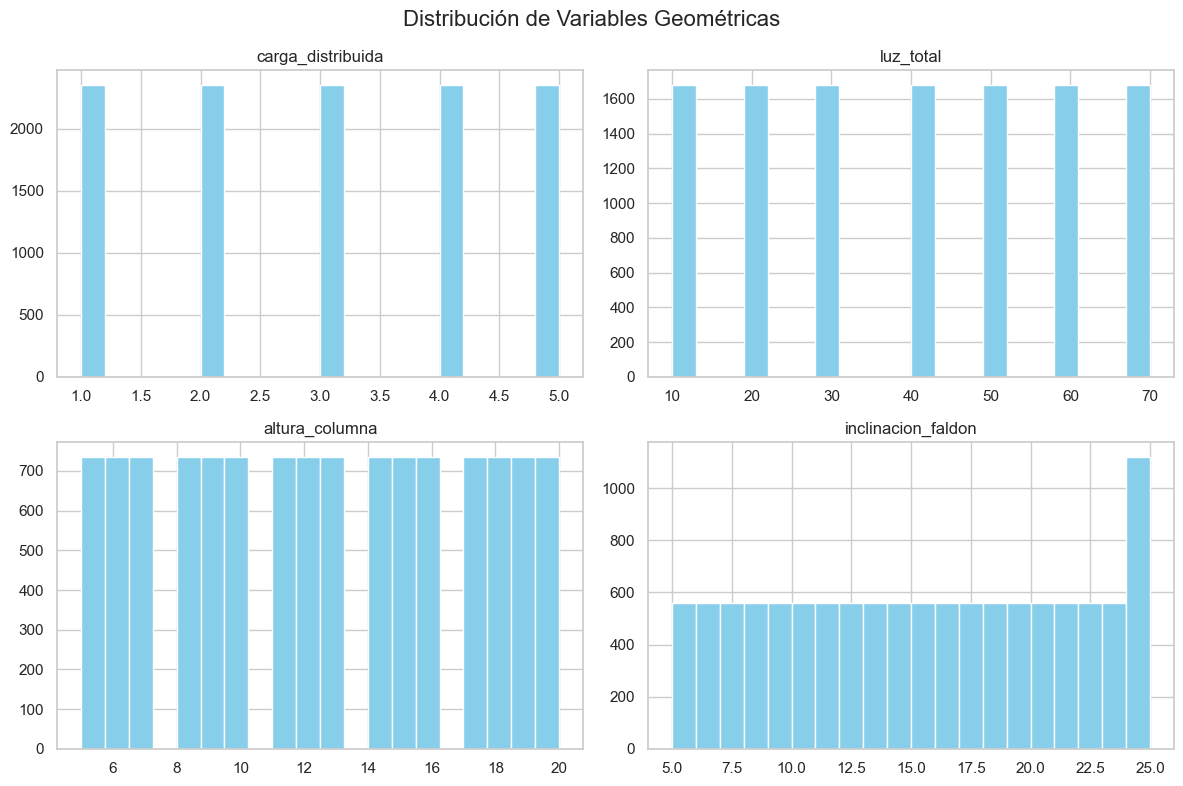

In [4]:
# Histograma de variables principales
numeric_cols = ['carga_distribuida', 'luz_total', 'altura_columna', 'inclinacion_faldon']
datos_portico[numeric_cols].hist(bins=20, figsize=(12,8), color='skyblue')
plt.suptitle('Distribución de Variables Geométricas', fontsize=16)
plt.tight_layout()
plt.show()

## Distribución de las Variables Geométricas del Pórtico

Se realizó una visualización mediante histogramas para las cuatro variables que definen la geometría de los pórticos evaluados:

- `carga_distribuida`: representa las cargas aplicadas sobre la estructura (entre 1 y 5).
- `luz_total`: distancia entre columnas, simulada de 10 a 70 m.
- `altura_columna`: altura de los apoyos verticales (entre 5 y 20 m).
- `inclinacion_faldon`: pendiente del techo a dos aguas, en grados.

### Análisis:

- La mayoría de las variables muestran una distribución **uniforme**, lo que indica que los casos fueron generados con incrementos regulares.
- La inclinación del faldón muestra un **ligero aumento en los valores más altos**, (Revisar la toma de datos)
- Esta visualización es útil para confirmar que el conjunto de datos cubre **ampliamente el espacio de parámetros geométricos** del problema estructural.

Este paso fue esencial para asegurar que el análisis posterior tenga validez estadística y esté basado en un muestreo representativo.


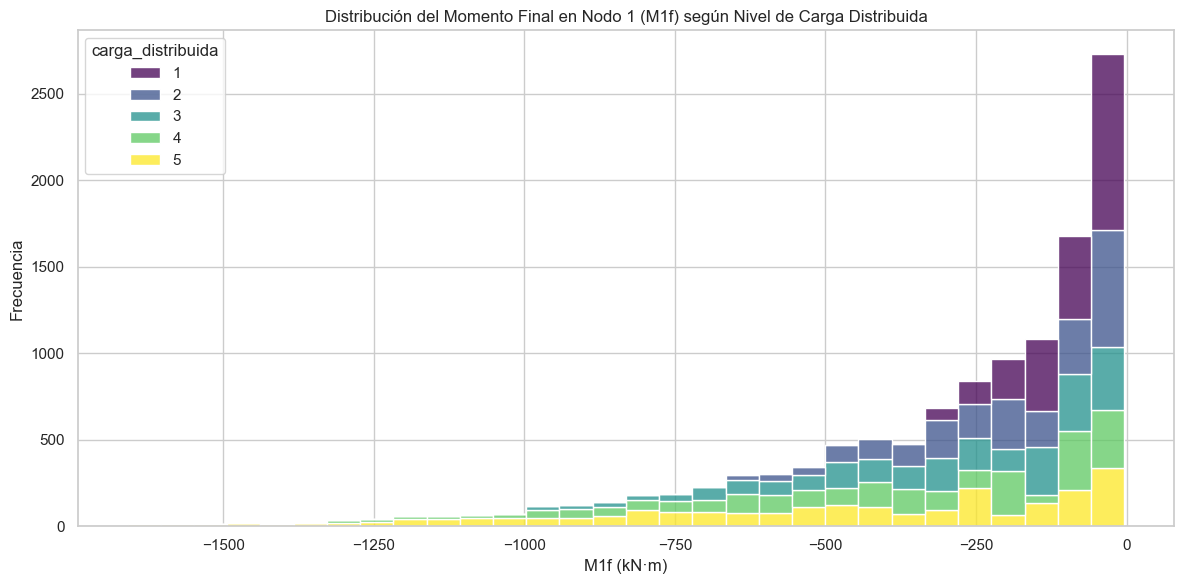

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(data=datos_portico, x='M1f', hue='carga_distribuida',
             multiple='stack', palette='viridis', bins=30)
plt.title('Distribución del Momento Final en Nodo 1 (M1f) según Nivel de Carga Distribuida')
plt.xlabel('M1f (kN·m)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()


## Distribución del Momento Final en Nodo 1 (M1f) según Niveles de Carga Distribuida

### Observaciones:

- A medida que se incrementa la carga distribuida, los valores de `M1f` se desplazan hacia la izquierda (más negativos), lo cual concuerda con el comportamiento esperado de un pórtico bajo carga creciente.
- Las barras más oscuras (carga baja) se concentran cerca del cero, mientras que las más claras (carga alta) aparecen en valores más extremos.
- Esta visualización confirma que la carga aplicada tiene un efecto directo y predecible sobre el momento en los apoyos del pórtico.

Esta alternativa al histograma de variables geométricas aporta **mayor profundidad técnica** al análisis exploratorio y permite conectar directamente las condiciones de entrada con las respuestas estructurales del modelo.


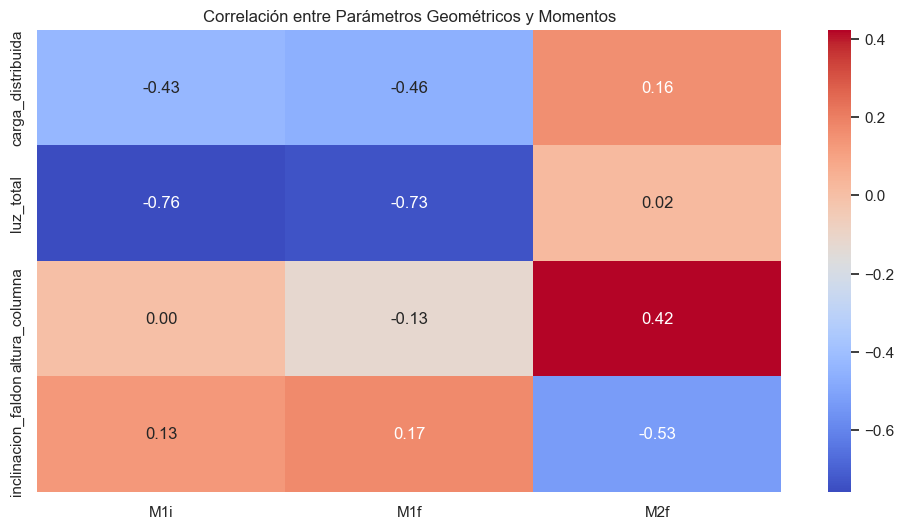

In [6]:
# Variables clave
entradas = ['carga_distribuida', 'luz_total', 'altura_columna', 'inclinacion_faldon']
momentos = ['M1i', 'M1f','M2f']

# Matriz de correlación filtrada
correlacion = datos_portico[entradas + momentos].corr().loc[entradas, momentos]

# Visualización
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre Parámetros Geométricos y Momentos")
plt.show()


## Correlación entre Parámetros Geométricos y Momentos Internos

Con el fin de identificar relaciones directas entre las variables geométricas del pórtico y los momentos estructurales internos, se generó un mapa de calor con la matriz de correlación filtrada.

### Principales hallazgos:

- **Luz total** muestra una correlación negativa fuerte con los momentos `M1i` y `M1f`, lo cual indica que estructuras con luces más largas tienden a generar momentos más intensos en los apoyos.
- **Carga distribuida** también tiene un efecto negativo moderado sobre `M1i` y `M1f`, como era de esperarse.
- **Inclinación del faldón** afecta particularmente el momento en el nodo 2 (`M2f`), con una correlación negativa clara.
- **Altura de columna** tiene una correlación baja o nula en los apoyos, pero algo más notoria con `M2f`.

Este tipo de visualización es útil para detectar **relaciones clave en el comportamiento estructural**, y para fundamentar decisiones de diseño con base en análisis de datos.


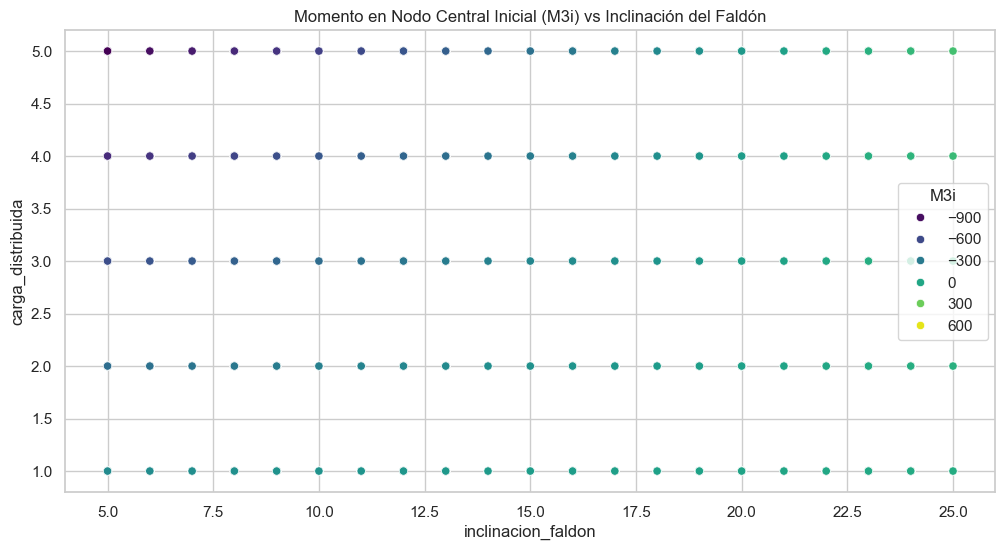

In [9]:
# Relación entre inclinación del faldón y momentos en nodo central
sns.scatterplot(data=datos_portico, x='inclinacion_faldon', y='carga_distribuida', hue='M3i', palette='viridis')
plt.title('Momento en Nodo Central Inicial (M3i) vs Inclinación del Faldón')
plt.show()

## Visualización de Tres Variables: M3i en función de Carga Distribuida e Inclinación del Faldón

Se modificó el gráfico anterior para mejorar la interpretación multivariable mediante el uso de color como tercera dimensión. En esta visualización:

- El eje **x** representa la `inclinacion_faldon` (entre 5° y 25°).
- El eje **y** muestra la `carga_distribuida` aplicada (valores entre 1 y 5).
- El **color** indica la magnitud del momento flector en el nodo central inicial (`M3i`), usando la paleta `viridis`.

### Observaciones:

- A medida que se incrementan la inclinación y la carga, el momento tiende a ser más intenso, con un cambio notable en la escala de color.
- Las zonas más oscuras indican momentos negativos (compresión), mientras que los tonos claros reflejan momentos positivos (tracción o flexión inversa).
- Esta visualización permite identificar combinaciones críticas de geometría y carga que generan esfuerzos extremos en el nodo central.

El uso del color como una dimensión adicional facilita la exploración visual de relaciones complejas en sistemas estructurales, cumpliendo con el enfoque exploratorio propuesto en el proyecto.


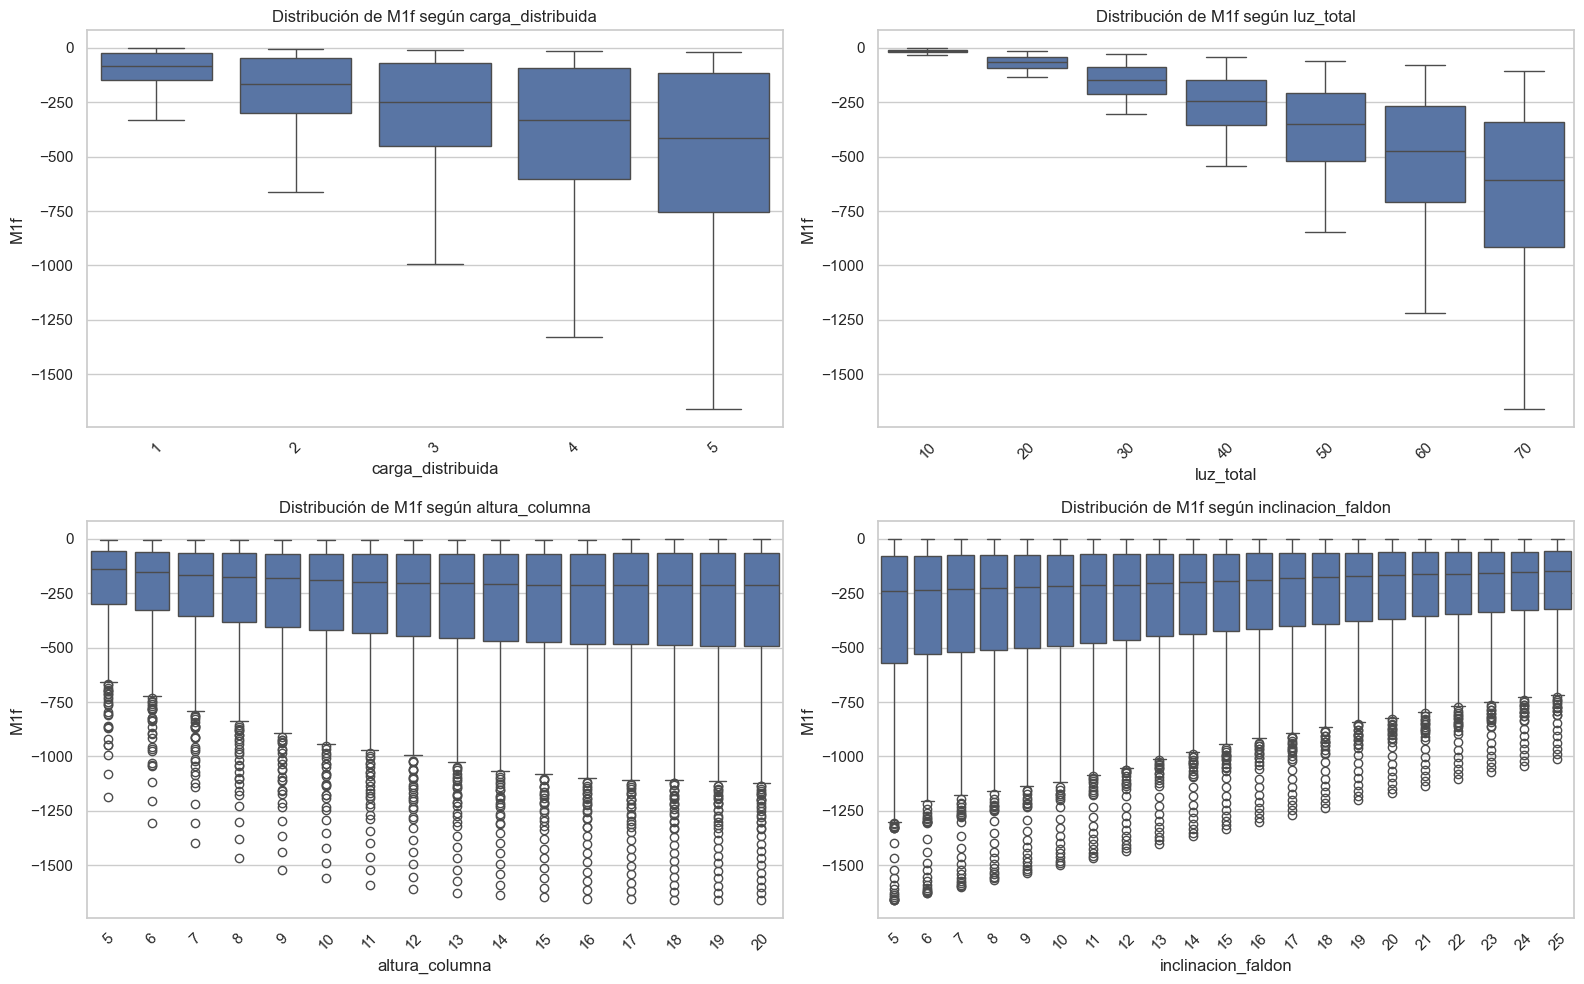

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
for i, col in enumerate(entradas):
    sns.boxplot(data=datos_portico, x=col, y='M1f', ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f'Distribución de M1f según {col}')
    axs[i//2, i%2].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## Análisis Comparativo del Momento Final en el Nodo 1 (M1f) según Variables Geométricas

A continuación se presentan cuatro gráficos tipo **boxplot** donde se analiza cómo varía el momento final en el nodo 1 (`M1f`) en función de las principales variables geométricas del pórtico:

- `carga_distribuida`
- `luz_total`
- `altura_columna`
- `inclinacion_faldon`

Esta herramienta gráfica, vista en clase, permite comparar de manera clara la dispersión, la tendencia central y los valores atípicos (outliers) de una variable de salida frente a distintas condiciones de entrada.

### Observaciones clave:

- **Carga Distribuida**: A medida que aumenta la carga (de 1 a 5), el momento `M1f` se vuelve cada vez más negativo. También se incrementa la dispersión, con varios outliers hacia valores extremos.
  
- **Luz Total**: Se observa una tendencia descendente clara en `M1f` con luces mayores. Esto se debe a que, estructuralmente, luces más largas generan momentos más altos en los extremos.
  
- **Altura de Columna**: Aunque la tendencia es menos marcada, las columnas más altas tienden a tener mayor dispersión y outliers negativos. Esto puede deberse a efectos de flexibilidad estructural.
  
- **Inclinación del Faldón**: Se identifica una progresión clara: al aumentar la inclinación del faldón, el momento `M1f` también se intensifica en magnitud negativa. Esto indica que el ángulo del techo influye directamente en cómo se distribuyen las cargas en la estructura.


Este análisis gráfico permite entender cuáles variables tienen mayor impacto sobre la respuesta estructural del pórtico. Según los resultados, la **carga distribuida** y la **luz total** son los factores más determinantes en la variación del momento final en el nodo 1.


## Conclusiones

A partir del análisis exploratorio realizado sobre la base de datos estructurales de pórticos tipo cercha, se pueden destacar las siguientes conclusiones relevantes:

1. **Relación clara entre parámetros geométricos y momentos estructurales**: Las visualizaciones muestran una dependencia significativa entre variables como la inclinación y la carga distribuida respecto a los momentos flectores en los nodos del pórtico. Este comportamiento refuerza la importancia de parametrizar el diseño en estructuras industriales.

2. **El uso de programación permite automatizar tareas repetitivas y detectar tendencias**: Gracias a las herramientas exploradas en el curso (como `pandas`, `seaborn` y `matplotlib`), fue posible generar gráficos comparativos, matrices de correlación y análisis por categorías que serían complejos de realizar manualmente.

3. **El diseño estructural se beneficia del análisis de datos**: La capacidad de visualizar la distribución de momentos (`M1f`, `M2f`, `M3i`, etc.) en función de variables de entrada permite tomar decisiones informadas en etapas tempranas del diseño.

4. **La metodología empleada es escalable**: Este enfoque puede adaptarse a otros tipos de estructuras o ampliarse con nuevos parámetros (como tipo de acero, sección transversal, etc.) para realizar evaluaciones estructurales más integrales.

## Recomendaciones

Con base en los hallazgos del análisis, se sugieren las siguientes recomendaciones para continuar con el desarrollo del proyecto de investigación y fortalecer el enfoque del curso:

- **Ampliar el análisis con indicadores adicionales**: Incorporar desplazamientos, fuerzas cortantes o esfuerzos máximos podría enriquecer el modelo y permitir validaciones más robustas.

- **Integrar criterios de sostenibilidad**: Considerar variables como la eficiencia del material o la huella de carbono por configuración ayudaría a alinear el análisis con objetivos ambientales del sector.

- **Conectar el análisis con herramientas de diseño estructural como SAP2000**: Automatizar el flujo de datos desde el análisis paramétrico hasta el modelado estructural puede reducir tiempos de simulación y validación.

- **Difundir los resultados como base normativa**: Este trabajo podría sentar las bases para desarrollar guías prácticas para el diseño de naves industriales en Ecuador, considerando eficiencia, seguridad y sostenibilidad.

En conjunto, este proyecto demuestra cómo la programación puede ser aplicada con éxito a problemas reales de la ingeniería estructural, y destaca el valor de unir datos, automatización y conocimiento técnico para la toma de decisiones estructurales en entornos sísmicos.
